In [25]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt
import libfmp.b

In [2]:
csv_test = pd.read_csv('../corpus/chords_sequences/Soulville.csv')
# csv_test

In [3]:
y_test, sr_test = librosa.load('../../big_corpus/wav_music21/Soulville.wav')

In [4]:
tempo, beats = librosa.beat.beat_track(y=y_test, sr=sr_test)
onset_env = librosa.onset.onset_strength(y=y_test, sr=sr_test,
                                         aggregate=np.median)

In [5]:
csv_test

,Measure,Soulville,chord_note,Time
0,1,Bb,Bb,0.0
1,34,Bbmin7,Bb,66.0
2,35,Ebmin7,Eb,68.0
3,36,Bbmin7,Bb,70.0
4,37,Bb7,Bb,72.0
5,38,Ebmin7,Eb,74.0
6,39,Ebmin7,Eb,76.0
7,40,Bbmin7,Bb,78.0
8,41,Bbmin9,Bb,80.0
9,42,Cmin7,C,82.0


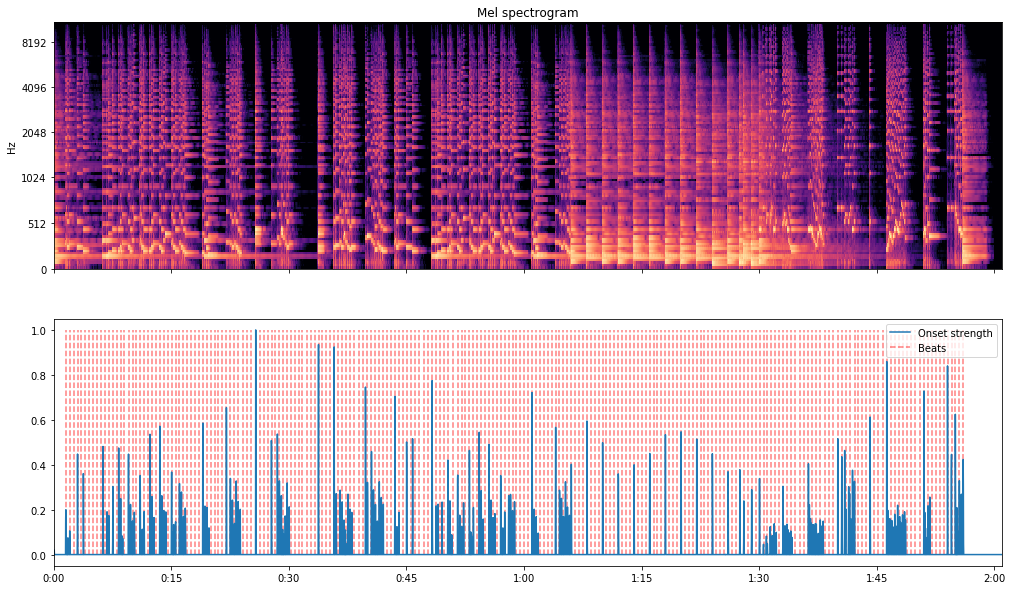

In [6]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(17,10))
times = librosa.times_like(onset_env, sr=sr_test#, hop_length=hop_length
                          )
M = librosa.feature.melspectrogram(y=y_test, sr=sr_test#, hop_length=hop_length
                                  )

librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', #hop_length=hop_length,
                         ax=ax[0])

ax[0].label_outer()
ax[0].set(title='Mel spectrogram')

ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')

ax[1].legend()

In [7]:
times[beats]

array([  1.55573696,   2.04335601,   2.53097506,   3.04181406,
         3.52943311,   4.01705215,   4.5046712 ,   4.99229025,
         5.50312925,   6.01396825,   6.52480726,   7.03564626,
         7.54648526,   8.03410431,   8.54494331,   9.03256236,
         9.54340136,  10.05424036,  10.54185941,  11.02947846,
        11.54031746,  12.02793651,  12.53877551,  13.02639456,
        13.53723356,  14.04807256,  14.53569161,  15.04653061,
        15.55736961,  16.04498866,  16.55582766,  17.04344671,
        17.53106576,  18.01868481,  18.52952381,  19.04036281,
        19.55120181,  20.03882086,  20.52643991,  21.01405896,
        21.52489796,  22.03573696,  22.54657596,  23.05741497,
        23.54503401,  24.10231293,  24.65959184,  25.21687075,
        25.77414966,  26.26176871,  26.77260771,  27.28344671,
        27.79428571,  28.28190476,  28.79274376,  29.30358277,
        29.79120181,  30.27882086,  30.76643991,  31.25405896,
        31.741678  ,  32.25251701,  32.76335601,  33.27

In [8]:
def get_chord_from_time(time, df_chords=csv_test, song_title='Soulville'):
    """
    Recebe um instante de tempo (float) em segundos e um data frame que contém os acordes,
    juntamente com o instante de tempo em que começam.
    Retorna o acorde referente ao instante de tempo desejado.
    """
    
    tempos = df_chords['Time'].values
    
    # precisamos pegar o tempo mais perto e menor
    closest_time = min([ i for i in tempos if i < time], key=lambda x:abs(x-time))
    chord = df_chords[df_chords['Time'] == closest_time][song_title].values[0]
    
    return chord

In [9]:
get_chord_from_time(time=115.03165533, df_chords=csv_test, song_title='Soulville')

'Bb'

In [10]:
csv_test['Time'].values

array([  0.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,
        86.,  87.,  88.,  89.,  90., 116.])

In [11]:
list(map(get_chord_from_time, times[beats]))

['Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bb',
 'Bbmin7',
 'Bbmin7',
 'Bbmin7',
 'Bbmin7',
 'Ebmin7',
 'Ebmin7',
 'Ebmin7',
 'Ebmin7',
 'Bbmin7',
 'Bbmin7',
 

Convertendo para segundos:

In [12]:
segs = np.linspace(0,
                   len(y_test)/sr_test, 
                   num=len(y_test))

Text(0.5, 0, 'time (s)')

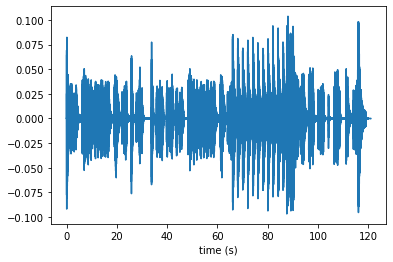

In [13]:
plt.plot(segs, y_test)
plt.xlabel('time (s)')

In [14]:
df_test = pd.DataFrame({'seconds':segs, 'signal': y_test})

In [15]:
df_test

,seconds,signal
0,0.000000,0.000035
1,0.000045,0.000029
2,0.000091,-0.000029
3,0.000136,-0.000117
4,0.000181,-0.000222
...,...,...
2668055,121.000272,-0.000002
2668056,121.000317,-0.000005
2668057,121.000363,-0.000003
2668058,121.000408,-0.000004


In [16]:
csv_test

,Measure,Soulville,chord_note,Time
0,1,Bb,Bb,0.0
1,34,Bbmin7,Bb,66.0
2,35,Ebmin7,Eb,68.0
3,36,Bbmin7,Bb,70.0
4,37,Bb7,Bb,72.0
5,38,Ebmin7,Eb,74.0
6,39,Ebmin7,Eb,76.0
7,40,Bbmin7,Bb,78.0
8,41,Bbmin9,Bb,80.0
9,42,Cmin7,C,82.0


In [10]:
# cut = 1.5
# df_cut = df_test[df_test.seconds < cut]
# # df_chroma = 
# chroma_test = librosa.feature.chroma_stft(y=df_cut['signal'].values, 
#                                         sr=sr_test, 
#                                         tuning=0, 
#                                         norm=None, 
#                                         hop_length=len(df_cut), 
#                                         n_fft=len(df_cut))


# plt.plot(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],
#           chroma_test);

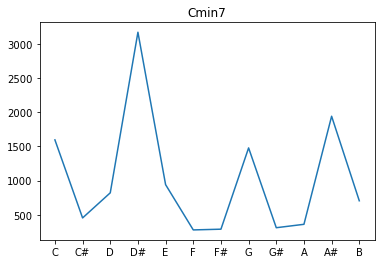

<Figure size 432x288 with 0 Axes>

In [41]:
# for i in csv_test.index:

chord = csv_test.iloc[9]['Soulville']

if 9 != len(csv_test) - 1:
    cut = csv_test.iloc[9]['Time']
    cut_forw = csv_test.iloc[9+1]['Time'] # o acorde dura até o instante em que entra o acorde seguinte
    df_cut = df_test[(df_test.seconds > cut) & (df_test.seconds < cut_forw)]            

else:
    cut = csv_test.iloc[9]['Time']
    df_cut = df_test[df_test.seconds > cut]


N = len(df_cut['signal'].values)
chroma = librosa.feature.chroma_stft(y=df_cut['signal'].values, 
                                        sr=sr_test, 
                                        tuning=0.0, 
                                        norm=0, 
                                        hop_length=N+1, 
                                        n_fft=N
                                    )


plt.plot(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],
          chroma);

plt.title(chord);
plt.show()
plt.clf()

# plt.plot(chroma)

O vetor acima (com 12 componentes) é um exemplo do que será o input do nosso modelo. Vemos que realmente faz sentido, visto que no trecho escolhido a harmonia ali presente é Cmin7 e, de fato, as principais frequências que encontramos foram C, Eb (que é o mesmo que D# acusticamente), G e B, notas que compõem este acorde.

Ideia: trocar tudo de bemol pra sustenido ou o contrário. Porque se não, teremos chromas com mesmas frequências e nomes diferentes.

### Generalizando:

In [40]:
chords_folder = '../corpus/chords_sequences/'
audios_folder = '../../big_corpus/wav_music21/'

counter = 0
for file in os.listdir(chords_folder)[:5]:
    
    chords = pd.read_csv(chords_folder + file)
    name = file.split('.csv')[0]
    
    y, sr = librosa.load(audios_folder + name + '.wav')
    
    segs = np.linspace(0, len(y)/sr, num=len(y))
    
    df = pd.DataFrame({'seconds':segs, 
                       'signal': y})
    
    
    for i in chords.index:
        
        chord = chords.iloc[i][name]
            
        if i != len(chords) - 1:
            cut = chords.iloc[i]['Time']
            cut_forw = chords.iloc[i+1]['Time'] # o acorde dura até o instante em que entra o acorde seguinte
            df_cut = df[(df.seconds > cut) & (df.seconds < cut_forw)]            
            
        else:
            cut = chords.iloc[i]['Time']
            df_cut = df[df.seconds > cut]

        chroma = librosa.feature.chroma_stft(y=df_cut['signal'].values, 
                                                sr=sr, 
                                                tuning=0.0, 
                                                norm=0, 
                                                hop_length=len(df_cut)+1, 
                                                n_fft=len(df_cut)
                                            )


        plt.plot(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],
                  chroma);
        plt.title(chord);
        plt.savefig('test_figures/{}_{}_chroma_example_{}.png'.format(name, chord, counter))
        plt.clf()
        
        counter += 1

<Figure size 432x288 with 0 Axes>